In [ ]:
# 필요한 라이브러리 설치

import tensorflow as tf
from tensorflow.keras import layers, models # layers, models,를 임포트하여 신경망의 층과 모델 정의
from tensorflow.keras.datasets import mnist # keras에서 MNIST 데이터 셋을 임포트
from matplotlib import pyplot as plt # 시각화를 위한 라이브러리

# MNIST 데이터셋 로드
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 데이터 전처리: 데이터 차원을 맞추고 정규화
x_train = x_train.reshape((60000, 28, 28, 1)).astype('float32') / 255.0 # MNIST 이미지 픽셀 값이 0~255까지의 정수이므로 0~1값으로 변환하기 위해 정규화 진행
x_test = x_test.reshape((10000, 28, 28, 1)).astype('float32') / 255.0

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


(60000, 28, 28, 1)


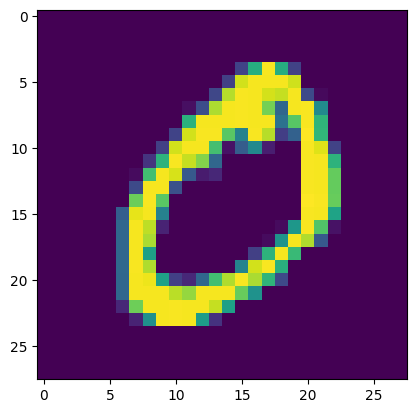

In [ ]:
print(x_train.shape) # x_train의 크기
plt.imshow(x_train[1]) # x_train의 시각화
plt.show()

In [ ]:
y_train = tf.one_hot(y_train, depth=10) # y_train을 원-핫 인코딩으로 변환
y_test = tf.one_hot(y_test, depth=10) # 훈련 데이터와 테스트 데이터의 레이블이 범주형이며 연속적이지 않다.
                                      # 따라서 one-hot 인코딩을 통해 범주형 데이터를 모델에 포함시킨다.

In [ ]:
# CNN 모델 정의

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1))) # 첫번째 합성곱 층
model.add(layers.MaxPooling2D((2, 2))) # 최대 풀링 층, 풀링은 서브 샘플링이라고도 하며 입력 데이터의 크기를 줄이는 것이다.
model.add(layers.Conv2D(64, (3, 3), activation='relu')) # 두번째 합성곱 층
model.add(layers.MaxPooling2D((2, 2))) # 두번째 최대 풀링 층
model.add(layers.Flatten()) # 평탄화, 2D 데이터를 다루기 위해 평탄화 작업 진행.
model.add(layers.Dense(64, activation='relu')) # 완전 연결 층, 64개의 뉴런을 설정하며 RELU 활성화 함수를 사용한다.
model.add(layers.Dense(10, activation='softmax')) # 출력층, 10개의 뉴런을 설정하며 Softmax 활성화 함수를 사용한다.

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# 모델 컴파일

model.compile(optimizer = 'adam', # 최적화 함수는 'adam'을 사용.
              loss = 'categorical_crossentropy', # 손실 함수는 'categorical_crossentropy'를 사용.
              metrics = ['accuracy']) # 모델의 예측이 얼마나 정확한지 측정.

In [ ]:
#모델 훈련
# epochs는 반복학습 횟수, bacth_size는 1epoch에 모든 데이터를 한번에 돌리는게 아니라, batch로 나누어 돌린다.
# 훈련 데이터의 20%(validation_split = 0.2)를 검증 데이터로 사용

model_train = model.fit(x_train, y_train, epochs = 5, batch_size = 64, validation_split = 0.2)

Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 50s 60ms/step - accuracy: 0.8499 - loss: 0.4937 - val_accuracy: 0.9776 - val_loss: 0.0739
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 76s 53ms/step - accuracy: 0.9810 - loss: 0.0621 - val_accuracy: 0.9849 - val_loss: 0.0527
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 42s 56ms/step - accuracy: 0.9871 - loss: 0.0419 - val_accuracy: 0.9867 - val_loss: 0.0459
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 41s 55ms/step - accuracy: 0.9900 - loss: 0.0320 - val_accuracy: 0.9859 - val_loss: 0.0489
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 80s 53ms/step - accuracy: 0.9915 - loss: 0.0271 - val_accuracy: 0.9837 - val_loss: 0.0581


In [ ]:
# 모델 평가

train_loss, train_acc = model.evaluate(x_train, y_train) # 훈련 정확도
print('훈련 정확도:', train_acc)
test_loss, test_acc = model.evaluate(x_test, y_test) # 테스트 정확도
print('테스트 정확도:', test_acc)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.9901 - loss: 0.0290
훈련 정확도: 0.9886500239372253
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9806 - loss: 0.0614
테스트 정확도: 0.9850000143051147


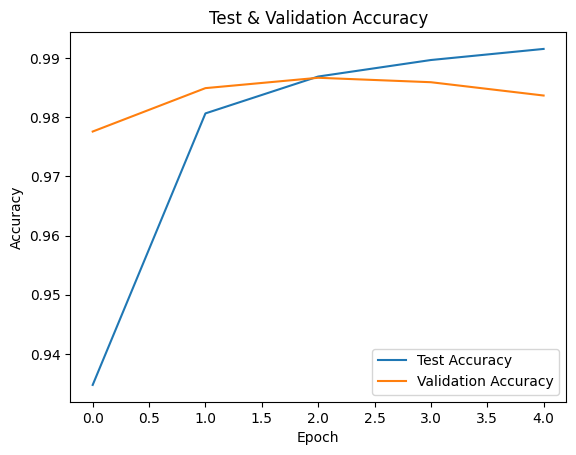

In [ ]:
# 훈련 과정 시각화

plt.plot(model_train.history['accuracy'], label = 'Test Accuracy') # 각 epoch 마다의 훈련 정확도
plt.plot(model_train.history['val_accuracy'], label = 'Validation Accuracy') # 각 epoch 마다의 검증 정확도
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Test & Validation Accuracy')
plt.savefig('cnn_accuracy_plot.png')  # 정확도 그래프 저장
plt.show()